# Predicting the sale price of bulldozers

## 1. Problem Definition
* How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data
* The data is downloaded from the Kaggle Community (Bluebook for Bulldozers Competition)

  The data for this competition is split into three parts:
  

* `Train.csv` is the training set, which contains data through the end of 2011.
* `Valid.csv` is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* `Test.csv` is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
* The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**Note**: The goal for most regression models is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimizes RMSLE.

## 4. Features

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import training and validation sets
df = pd.read_csv("dataa/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

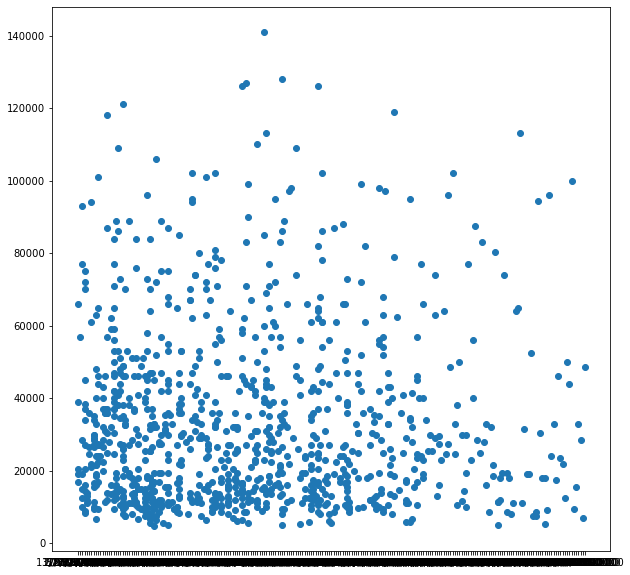

In [5]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

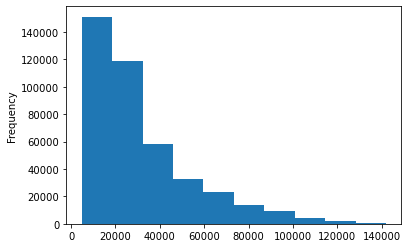

In [6]:
df.SalePrice.plot.hist();

# Parsing dates

* When we work with time series data, we want to enrich the time and date component as much as possible.
* We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [7]:
# Import data again but this time with parse_dates
df = pd.read_csv("dataa/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory = False,
                 parse_dates=["saledate"])

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

In [9]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

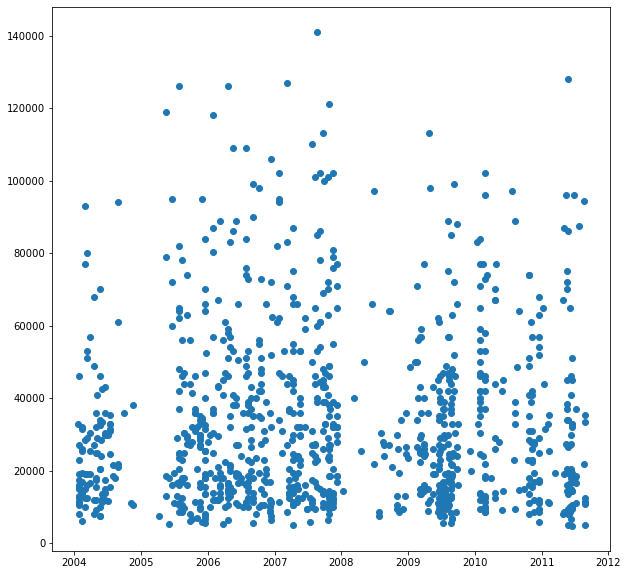

In [10]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [11]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# When there are many columns in our dataset, and we want to see all columns then we will make use of this code
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [13]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate
When working with time series data, it's good idea to sort it by date.

In [14]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=False)
df.saledate.head(20)

411423   2012-04-28
409783   2012-04-28
409202   2012-04-28
411522   2012-04-28
409203   2012-04-28
410879   2012-04-28
411465   2012-04-28
408976   2012-04-28
411334   2012-04-28
412164   2012-04-28
411319   2012-04-28
409297   2012-04-28
412218   2012-04-28
409901   2012-04-28
408889   2012-04-28
412476   2012-04-28
409896   2012-04-28
411527   2012-04-28
411599   2012-04-28
411649   2012-04-28
Name: saledate, dtype: datetime64[ns]

In [15]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
411423,6309986,16000.0,1899882,9508,149,99.0,2005,NaN,NaN,2012-04-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
409783,6286233,24000.0,1932403,4605,149,99.0,2005,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409202,6283634,35000.0,1930870,4701,149,99.0,1998,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
411522,6310488,7000.0,1911585,9550,149,99.0,1000,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409203,6283635,34000.0,1869284,4701,149,99.0,1000,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


### Make a copy of the original DataFrame
We make a copy of the original DataFrame so when we manipulate the copy, we've still got our original data.

In [16]:
# Make a copy
df_temp = df.copy()

In [17]:
df_temp.saledate.head(20)

411423   2012-04-28
409783   2012-04-28
409202   2012-04-28
411522   2012-04-28
409203   2012-04-28
410879   2012-04-28
411465   2012-04-28
408976   2012-04-28
411334   2012-04-28
412164   2012-04-28
411319   2012-04-28
409297   2012-04-28
412218   2012-04-28
409901   2012-04-28
408889   2012-04-28
412476   2012-04-28
409896   2012-04-28
411527   2012-04-28
411599   2012-04-28
411649   2012-04-28
Name: saledate, dtype: datetime64[ns]

### Add datetime parameters for `saledate` column

In [18]:
df_temp[:1].saledate.dt.year

411423    2012
Name: saledate, dtype: int64

In [19]:
df_temp[:1].saledate.dt.day

411423    28
Name: saledate, dtype: int64

In [20]:
df_temp[:1].saledate.dt.month

411423    4
Name: saledate, dtype: int64

In [21]:
df_temp[:1].saledate

411423   2012-04-28
Name: saledate, dtype: datetime64[ns]

In [22]:
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [23]:
df_temp.head().T

,411423,409783,409202,411522,409203
SalesID,6309986,6286233,6283634,6310488,6283635
SalePrice,16000.0,24000.0,35000.0,7000.0,34000.0
MachineID,1899882,1932403,1930870,1911585,1869284
ModelID,9508,4605,4701,9550,4701
datasource,149,149,149,149,149
auctioneerID,99.0,99.0,99.0,99.0,99.0
YearMade,2005,2005,1998,1000,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


### Now we have enriched our DataFrame with datetime features, we can remove `saledate`

In [24]:
df_temp.drop("saledate", axis=1, inplace=True)

In [25]:
# Check the values of different columns
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# 4. Modelling
Now let's start doing model-driven EDA.

### Convert string to categories
One way we can turn all our data into numbers is by converting them into pandas categories.

In [26]:
df_temp.head().T

,411423,409783,409202,411522,409203
SalesID,6309986,6286233,6283634,6310488,6283635
SalePrice,16000.0,24000.0,35000.0,7000.0,34000.0
MachineID,1899882,1932403,1930870,1911585,1869284
ModelID,9508,4605,4701,9550,4701
datasource,149,149,149,149,149
auctioneerID,99.0,99.0,99.0,99.0,99.0
YearMade,2005,2005,1998,1000,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,331,310G,544H,753,544H


In [27]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [28]:
# Find the column which contains string
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [29]:
# If you are wondering what df.items() do, here is an example
random_dict = {"greet1": "Hello",
               "greet2": "Namaste",
               "greet3": "Bonjour"}
for key, value in random_dict.items():
    print(f"This is a key:{key}")
    print(f"This is a value: {value}")

This is a key:greet1
This is a value: Hello
This is a key:greet2
This is a value: Namaste
This is a key:greet3
This is a value: Bonjour


In [30]:
# This will turn all the string values into the categorical values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [31]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 411423 to 205615
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [32]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [33]:
df_temp.state.cat.codes

411423     4
409783     4
409202     4
411522     4
409203     4
          ..
92301      8
113547     8
88803      8
142669     8
205615    43
Length: 412698, dtype: int8

In [34]:
# Check missing data
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [35]:
# Export current temp dataframe
df_temp.to_csv("dataa/bluebook-for-bulldozers/train_tmp.csv", index = False)

In [36]:
# Import preprocessed data
df_temp = pd.read_csv("dataa/bluebook-for-bulldozers/train_tmp.csv", low_memory=False)
df_temp.head().T

,0,1,2,3,4
SalesID,6309986,6286233,6283634,6310488,6283635
SalePrice,16000.0,24000.0,35000.0,7000.0,34000.0
MachineID,1899882,1932403,1930870,1911585,1869284
ModelID,9508,4605,4701,9550,4701
datasource,149,149,149,149,149
auctioneerID,99.0,99.0,99.0,99.0,99.0
YearMade,2005,2005,1998,1000,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,331,310G,544H,753,544H


In [37]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

# Fill missing values

### a) Fill numerical values first

In [38]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [39]:
# Check for which numerical columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [40]:
# Fill the numeric row with the median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_temp[label + "_is_missing"] = pd.isnull(content)
            # Fill missing numerical values with median
            df_temp[label] = content.fillna(content.median())

In [41]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000,),100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [42]:
# Check if there is any null numeric values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [43]:
# Check to see how many examples were missing
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

## Filling and turning categorical variables into numbers

In [44]:
# Check for columns which are not numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [45]:
# Turn categorical variables into numbers and fill missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes + 1

In [46]:
pd.Categorical(df_temp["state"]).codes

array([ 4,  4,  4, ...,  8,  8, 43], dtype=int8)

In [47]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [48]:
df_temp.head().T

,0,1,2,3,4
SalesID,6309986,6286233,6283634,6310488,6283635
SalePrice,16000.0,24000.0,35000.0,7000.0,34000.0
MachineID,1899882,1932403,1930870,1911585,1869284
ModelID,9508,4605,4701,9550,4701
datasource,149,149,149,149,149
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,True,True,False,True,False


In [49]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model

In [50]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,6309986,16000.0,1899882,9508,149,99.0,2005,0.0,0,613,...,False,False,False,False,False,True,True,True,True,True
1,6286233,24000.0,1932403,4605,149,99.0,2005,0.0,0,500,...,True,True,True,True,True,True,True,True,True,True
2,6283634,35000.0,1930870,4701,149,99.0,1998,0.0,0,989,...,True,True,True,True,True,True,True,True,False,False
3,6310488,7000.0,1911585,9550,149,99.0,1000,0.0,0,1413,...,True,True,True,True,True,True,True,True,True,True
4,6283635,34000.0,1869284,4701,149,99.0,1000,0.0,0,989,...,True,True,True,True,True,True,True,True,False,False


In [51]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
model.fit(df_temp.drop("SalePrice",axis=1), df_temp["SalePrice"])

CPU times: total: 38min 10s
Wall time: 12min 14s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [52]:
# Score the model
model.score(df_temp.drop("SalePrice",axis=1), df_temp["SalePrice"])

0.9875413557951439

**Question**: Why doesn't the above metric hold water? (why isn't the metric reliable)

## Splitting data into train/validation sets

In [53]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,6309986,16000.0,1899882,9508,149,99.0,2005,0.0,0,613,...,False,False,False,False,False,True,True,True,True,True
1,6286233,24000.0,1932403,4605,149,99.0,2005,0.0,0,500,...,True,True,True,True,True,True,True,True,True,True
2,6283634,35000.0,1930870,4701,149,99.0,1998,0.0,0,989,...,True,True,True,True,True,True,True,True,False,False
3,6310488,7000.0,1911585,9550,149,99.0,1000,0.0,0,1413,...,True,True,True,True,True,True,True,True,True,True
4,6283635,34000.0,1869284,4701,149,99.0,1000,0.0,0,989,...,True,True,True,True,True,True,True,True,False,False


In [54]:
df_temp.saleYear

0         2012
1         2012
2         2012
3         2012
4         2012
          ... 
412693    1989
412694    1989
412695    1989
412696    1989
412697    1989
Name: saleYear, Length: 412698, dtype: int64

In [55]:
df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [56]:
# Split data into training and validation
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [57]:
# Split data into X and y
X_train, y_train = df_train.drop("SalePrice",axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [58]:
y_train

11573     11500.0
11574     21500.0
11575     19000.0
11576     70000.0
11577     27500.0
           ...   
412693    24000.0
412694    11000.0
412695    39000.0
412696    28000.0
412697     9500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function

In [59]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Validation R^2": r2_score(y_valid, val_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

In [60]:
# # This takes far too long... for experimenting

# %%time
# model = RandomForestRegressor(n_jobs=-1, random_state=42)

# model.fit(X_train, y_train)

In [61]:
len(X_train)

401125

In [62]:
# Change max samples value
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [63]:
%%time

#Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

CPU times: total: 1min 20s
Wall time: 37 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [64]:
(X_train.shape[0] * 100)/1000000

40.1125

In [65]:
show_scores(model)

{'Training MAE': 5568.883293487067,
 'Valid MAE': 7140.143341398082,
 'Training RMSLE': 0.25781635376791157,
 'Valid RMSLE': 0.29370482262325115,
 'Training R^2': 0.8601739277522921,
 'Validation R^2': 0.834050744359539}

### Hyperparameter Tuning with RandomizedSearchCV

In [66]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressors hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_distributions = rf_grid, n_iter = 5, cv=5, verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 2min 43s
Wall time: 5min 28s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [67]:
# Find the best model parameters
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [68]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 5847.30827984438,
 'Valid MAE': 7439.36515828939,
 'Training RMSLE': 0.26804177157709774,
 'Valid RMSLE': 0.2999531305768911,
 'Training R^2': 0.8440078938983898,
 'Validation R^2': 0.8119009867720461}

### Train a model with the best hyperparameters

**Note**: These were found after 100 iterations of RandomizedSearchCV

In [72]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=42, min_samples_split=14, min_samples_leaf=1, max_samples=None, max_features=0.5)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 6min 54s
Wall time: 2min 14s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [73]:
# Evaluate this model
show_scores(ideal_model)

{'Training MAE': 2951.501489424649,
 'Valid MAE': 5948.526410687687,
 'Training RMSLE': 0.14450433565538304,
 'Valid RMSLE': 0.2457570060611039,
 'Training R^2': 0.9589459626126405,
 'Validation R^2': 0.8813849691417496}

### Make Predictions on test data

In [97]:
# Import the test data
df_test = pd.read_csv("dataa/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [98]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric row with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label + "_is_missing"] = pd.isnull(content)
                # Fill missing numerical values with median
                df[label] = content.fillna(content.median())
            
        # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    return df

In [99]:
# Process test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [101]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [103]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has the same features as our training dataframe, we can make predictions..

In [105]:
# Make predictions on updated test data
test_preds = ideal_model.predict(df_test)

D:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [107]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,20998.052248
1,1227844,19646.436642
2,1227847,46423.170630
3,1227848,67333.213115
4,1227863,47063.594268
...,...,...
12452,6643171,45660.049250
12453,6643173,16519.103075
12454,6643184,16756.808514
12455,6643186,20557.180858


In [108]:
# Export predictions data
df_preds.to_csv("dataa/bluebook-for-bulldozers/test_predictions.csv", index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable(SalePrice).

In [111]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.56921921e-02, 1.90257208e-02, 4.44105727e-02, 1.59389222e-03,
       3.34970363e-03, 2.00112322e-01, 3.24438253e-03, 9.96985942e-04,
       4.29818428e-02, 4.96408543e-02, 6.13742427e-02, 5.12848133e-03,
       1.48413489e-02, 1.59102523e-01, 4.26717876e-02, 5.97461706e-03,
       3.79305006e-03, 5.22603368e-03, 3.84560477e-03, 6.64900621e-02,
       5.97667601e-04, 4.40209781e-04, 1.21852843e-03, 1.67349858e-04,
       8.65586702e-04, 2.04076212e-05, 2.30180559e-03, 6.32791108e-04,
       2.76098313e-03, 4.03655332e-04, 3.96038540e-03, 3.60545570e-03,
       4.70992423e-03, 2.68825786e-04, 3.61379314e-04, 5.33556139e-03,
       8.95469994e-04, 1.46084666e-02, 8.17945118e-04, 1.63731861e-03,
       9.42509758e-04, 8.93339452e-04, 2.48349763e-03, 5.59802824e-04,
       2.93764047e-04, 3.54289556e-04, 1.33496990e-04, 1.85197218e-03,
       9.52022945e-04, 2.21074048e-04, 9.83598071e-04, 7.28650846e-02,
       3.78121095e-03, 5.72144376e-03, 2.85645801e-03, 9.89811944e-03,
      

In [116]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances}).sort_values("feature_importances", ascending=False).reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

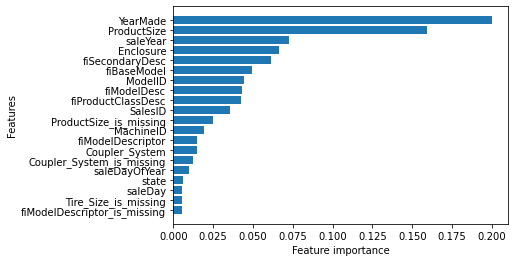

In [117]:
plot_features(X_train.columns, ideal_model.feature_importances_)